# **Emotion_Detection_of_Text | NLP**

Natural language processing is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving all.csv to all.csv


In [2]:
import pandas as pd
import io

train = pd.read_csv(io.BytesIO(uploaded['all.csv']))

In [3]:
print("There are {} text samples with its corresponding emotions in the data set".format(len(train)))
print("---------------------------------------------------------------------------------------------------------")
train.head()

There are 20000 text samples with its corresponding emotions in the data set
---------------------------------------------------------------------------------------------------------


,feature,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


## **Plot the number of samples per emotion**

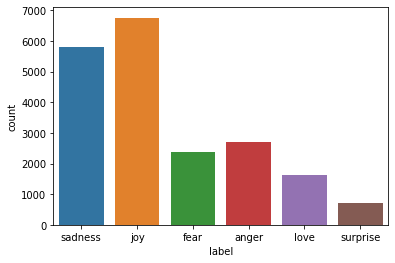

In [4]:
import seaborn as sns

sns.countplot(x='label',data=train)

Processing the text by removing noices

In [ ]:
pip install neattext

In [6]:
import neattext.functions as nfx

def neat_text(x):
  x['neat_text'] = x['feature'].apply(nfx.remove_userhandles)
  x['neat_text'] = x['neat_text'].apply(nfx.remove_punctuations)

neat_text(train)

In [7]:
train.head()

,feature,label,neat_text
0,im feeling rather rotten so im not very ambiti...,sadness,im feeling rather rotten so im not very ambiti...
1,im updating my blog because i feel shitty,sadness,im updating my blog because i feel shitty
2,i never make her separate from me because i do...,sadness,i never make her separate from me because i do...
3,i left with my bouquet of red and yellow tulip...,joy,i left with my bouquet of red and yellow tulip...
4,i was feeling a little vain when i did this one,sadness,i was feeling a little vain when i did this one


## **Load the dataset**

In [14]:
X = train['neat_text']
Y = train['label']

## **Vectorizing the text inputs**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [16]:
tfv = TfidfVectorizer()
X = tfv.fit_transform(X)

## **Train-Test Splitting**

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

## **Logistic Regression Model**

In [18]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
accuracy = model.score(X_test,Y_test)*100
print("ACCURACY")
print("-----------------------------------------------------------")
print("The model has a test accuracy of {} % ".format(accuracy))

ACCURACY
-----------------------------------------------------------
The model has a test accuracy of 85.975 % 


## **Classification Report**

In [20]:
from sklearn.metrics import classification_report

Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

       anger       0.90      0.78      0.84       548
        fear       0.89      0.74      0.81       488
         joy       0.83      0.95      0.88      1346
        love       0.89      0.62      0.73       339
     sadness       0.87      0.96      0.91      1133
    surprise       0.89      0.49      0.63       146

    accuracy                           0.86      4000
   macro avg       0.88      0.76      0.80      4000
weighted avg       0.86      0.86      0.85      4000



# **Predicting Live Samples**

In [25]:
def predict_emotion(text):
  txt = [text]
  vect = tfv.transform(txt).toarray()
  pred = model.predict(vect)[0]
  for i in range(len(model.classes_)):
    if model.classes_[i] == pred:
      pred_score = model.predict_proba(vect)[0][i]*100
  print("Predicted Emotion: {}, Prediction Probability: {:.2f} %".format(pred,pred_score))
  print("---------------------------------------------------------------------------")
  print("Emotions and their probabilities")
  for i in range(len(model.classes_)):
    print("{} : {:.2f} %".format(model.classes_[i],model.predict_proba(vect)[0][i]*100))

### **Sample Text 1**

In [26]:
predict_emotion("I am frustrated at the way things are.")

Predicted Emotion: anger, Prediction Probability: 82.17 %
---------------------------------------------------------------------------
Emotions and their probabilities
anger : 82.17 %
fear : 5.14 %
joy : 3.34 %
love : 1.63 %
sadness : 6.20 %
surprise : 1.53 %


### **Sample Text 2**

In [27]:
predict_emotion("Thank you! This is the best thing I can ask for.")

Predicted Emotion: joy, Prediction Probability: 49.05 %
---------------------------------------------------------------------------
Emotions and their probabilities
anger : 11.97 %
fear : 8.73 %
joy : 49.05 %
love : 10.23 %
sadness : 18.47 %
surprise : 1.54 %


### **Sample Text 3**

In [28]:
predict_emotion("I am really scared of a spider")

Predicted Emotion: fear, Prediction Probability: 73.36 %
---------------------------------------------------------------------------
Emotions and their probabilities
anger : 6.54 %
fear : 73.36 %
joy : 6.12 %
love : 3.27 %
sadness : 8.55 %
surprise : 2.15 %


In [ ]:
'''
///////////////////////////////////////////////////////////////////////////////
#Run these functions to obtain the keywords of every emotions

from collections import Counter

def get_counter(doc):
  num = [word for word in doc.split()]
  most_common_ = Counter(num).most_common(69)
  return dict(most_common_)

def get_doc(x,emotion):
  list = x[x['label'] == emotion]['input'].tolist()
  doc = ' '.join(list)
  return doc

# joy_doc = get_doc(train,'joy')
# counter_joy = get_counter(joy_doc)     #Can be used for any emotion
# counter_joy


///////////////////////////////////////////////////////////////////////////////
'''